# Preparations

In [1]:
# modules for matrix operations
import numpy as np
import scipy.linalg

# modules for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path
import matplotlib.patches as patches
# from http://matplotlib.org/users/path_tutorial.html
'''
verts should look like this:
verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]
''' 
# codes that specify how to create a polygon path with the above vertices.
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

# to include images
from IPython.display import Image

# Definition of motion and derived deformation measures

In [2]:
# motion
def motion(X, t):
    return np.array([X[0] + X[1]*t, X[1] + 0.5*X[0]*t])

# Deformation gradient
def F(t):
    return np.array([[1.0, t], [0.5*t, 1.0]])

# Right Cauchy-Green tensor
def C(t):
    return np.dot(np.transpose(F(t)), F(t))

# Left Cauchy-Green tensor
def B(t):
    return np.dot(F(t), np.transpose(F(t)))

# Compute R and U. F = RU. C = F^T.F = U^T.R^T.R.U = U^2 --> U = sqrt(C).
def U(t):
    return scipy.linalg.sqrtm(C(t))

def Ru(t):
    return np.dot(F(t), np.linalg.inv(U(t)))

# Compute V and R. F = VR. B = F.F^T = V.R.R^T.V^T = V^2 --> V = sqrt(B).
def V(t):
    return scipy.linalg.sqrtm(B(t))
def Rv(t):
    return np.dot(np.linalg.inv(V(t)), F(t))

# Lagrange strain: E = 0.5*(C-I)
def E(t):
    return 0.5*(C(t) - np.eye(2))

# Displacement gradient: \partial u/\partial X = F - I.
def dudX(t):
    return F(t) - np.eye(2)
# small strain tensor: \epsilon = 1/2 (dudX + dudX^T)
def eps(t):
    return 0.5 * ( dudX(t) + np.transpose(dudX(t)))
# spin tensor: \epsilon = 1/2 (dudX - dudX^T)
def omega(t):
    return 0.5 * ( dudX(t) - np.transpose(dudX(t)))

In [3]:
# Define a set of points in the reference configuration.
ref_points = np.array([[0.0, 0.0],[1.0, 0.0],[1.0, 1.0],[0.0,1.0]])
num_points = ref_points.shape[0]

# create a path for the reference configuration
verts = []
for i in range(4):
    verts.append( (ref_points[i][0],ref_points[i][1]) )
verts.append((ref_points[0][0],ref_points[0][1]))
ref_polygon = Path(verts, codes)

# Create an array for mapped points
cur_points = np.zeros((4,2))

# (1) Deformed square at t=1

## Map the corner points of the reference configuration by the given motion

In [4]:
for i in range(num_points):
    cur_points[i] = motion(ref_points[i], 1.0)
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_motion = Path(verts, codes)

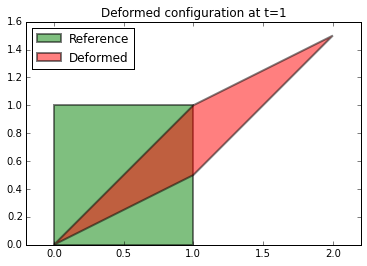

In [5]:
fig = plt.figure()
ax = fig.gca()

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Reference')
patch2 = patches.PathPatch(polygon_by_motion, facecolor='red', alpha=0.5, lw=2, label='Deformed')
ax.add_patch(patch1)
ax.add_patch(patch2)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')
plt.legend(loc=2)
plt.title("Deformed configuration at t=1")
plt.show(fig)
#fig.savefig('F_mapping01.pdf',format='pdf')

## Deformation gradient and the Green strain

In [6]:
print "F=",F(1.0)
print "E=",E(1.0)

F= [[ 1.   1. ]
 [ 0.5  1. ]]
E= [[ 0.125  0.75 ]
 [ 0.75   0.5  ]]


# (2) Velocity and acceleration at t=1

## spatial and material velocities

Since $x_{1}=X_{1} + X_{2}t$ and $x_{2}=X_{2} + X_{1}t/2$, 
\begin{align*}
  X_{1} &= \frac{2x_{1}-2x_{2}t}{2-t^{2}}, \\  X_{2} &= \frac{2x_{2}-x_{1}t}{2-t^{2}}.
\end{align*}
The material velocity $\mathbf{V}(X_{1},X_{2},t)$ is
\begin{equation}
  \mathbf{V}(X_{1},X_{2},t) = \frac{\partial \mathbf{x}(\mathbf{X},t)}{\partial t} = (X_{2}, 0.5X_{1})^{T}.
\end{equation}
The spatial velocity $\mathbf{v}(x_{1},x_{2},t)$ is
\begin{equation}
  \mathbf{v}(x_{1},x_{2},t) = (X_{2}(x_{1},x_{2},t), 0.5X_{1}(x_{1},x_{2},t))^{T} = 
  ( \frac{2x_{2}-x_{1}t}{2-t^{2}}, \frac{x_{1}-x_{2}t}{2-t^{2}} )^{T}
\end{equation}

At t=1,
\begin{align*}
  \mathbf{V} &= (X_{2}, 0.5X_{1})^{T} \\
  \mathbf{v} &= ( 2x_{2}-x_{1}, x_{1}-x_{2} )^{T}
\end{align*}


## spatial and material accelerations

\begin{equation*}
  \mathbf{A}(\mathbf{X},t) = \frac{\partial \mathbf{V}(\mathbf{X},t)}{\partial t} = (0, 0)^{T}
\end{equation*}

\begin{equation*}
  \mathbf{a}(\mathbf{x},t) = \frac{d\mathbf{v}(\mathbf{x},t)}{dt} = \frac{\partial \mathbf{v}}{\partial t} + \mathbf{v} \cdot \nabla \mathbf{v}
\end{equation*}

\begin{equation*}
  \frac{\partial \mathbf{v}}{\partial t} 
  = ( \frac{ 2t(2x_{2}-x_{1}t)-x_{1}(2-t^{2})}{(2-t^{2})^{2}},
  \frac{ 2t(x_{1}-x_{2}t)-x_{2}(2-t^{2})}{(2-t^{2})^{2}} )^{T}
  = ( \frac{ -(t^{2}+2)x_{1}+4tx_{2}}{(2-t^{2})^{2}},
  \frac{ 2tx_{1}-(t^{2}+2)x_{2}}{(2-t^{2})^{2}} )^{T}
\end{equation*}

Since
\begin{equation*}
  \mathbf{v} \cdot \nabla = v_{1}\frac{\partial}{\partial x_{1}} + v_{2} \frac{\partial}{\partial x_{2}},
\end{equation*}
\begin{equation*}
  \begin{split}
  (\mathbf{v} \cdot \nabla)\mathbf{v} &= (v_{1}\frac{\partial v_{1}}{\partial x_{1}} + v_{2} \frac{\partial v_{1}}{\partial x_{2}}, v_{1}\frac{\partial v_{2}}{\partial x_{1}} + v_{2} \frac{\partial v_{2}}{\partial x_{2}})^{T} \\
  &= ( \frac{ 2x_{2}-x_{1}t}{2-t^{2}}\frac{-t}{2-t^{2}}+\frac{x_{1}-x_{2}t}{2-t^{2}}\frac{2}{2-t^{2}},
       \frac{ 2x_{2}-x_{1}t}{2-t^{2}}\frac{1}{2-t^{2}}+\frac{x_{1}-x_{2}t}{2-t^{2}}\frac{-t}{2-t^{2}} )^{T} \\
  &= ( \frac{ (t^{2}+2)x_{1}-4tx_{2}}{(2-t^{2})^{2}},
  \frac{ -2tx_{1}+(t^{2}+2)x_{2}}{(2-t^{2})^{2}} )^{T}
  \end{split}
\end{equation*}

Combining the above results, we get
\begin{equation*}
  \mathbf{a} = \frac{\partial \mathbf{v}}{\partial t} + \mathbf{v} \cdot \nabla \mathbf{v} = (0, 0)^{T}.
\end{equation*}

# (3) Small strain and spin tensors at t=1.

In [7]:
print "epsilon=", eps(1.0)
print "omega=", omega(1.0)

epsilon= [[ 0.    0.75]
 [ 0.75  0.  ]]
omega= [[ 0.    0.25]
 [-0.25  0.  ]]


# (4) Repeat (1)-(3) for t=0.5

## Deformed configuration, $\mathbf{F}$ and $\mathbf{E}$

In [8]:
for i in range(num_points):
    cur_points[i] = motion(ref_points[i], 0.5)
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_motion = Path(verts, codes)

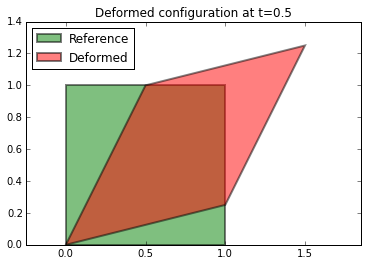

In [9]:
fig = plt.figure()
ax = fig.gca()

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Reference')
patch2 = patches.PathPatch(polygon_by_motion, facecolor='red', alpha=0.5, lw=2, label='Deformed')
ax.add_patch(patch1)
ax.add_patch(patch2)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')
plt.legend(loc=2)
plt.title("Deformed configuration at t=0.5")
plt.show(fig)

In [10]:
print "F=",F(0.5)
print "E=",E(0.5)

F= [[ 1.    0.5 ]
 [ 0.25  1.  ]]
E= [[ 0.03125  0.375  ]
 [ 0.375    0.125  ]]


## Material and spatial velocities and accelerations

At t=0.5,
\begin{align*}
  \mathbf{V} &= (X_{2}, 0.5X_{1})^{T} \\
  \mathbf{v} &= ( \frac{2x_{2}-0.5x_{1}}{1.75}, \frac{x_{1}-0.5x_{2}}{1.75} )^{T} \\
  \mathbf{A} &= \mathbf{a} = (0,0)
\end{align*}

## $\boldsymbol{\varepsilon}$ and $\boldsymbol{\omega}$

In [11]:
print "epsilon=", eps(0.5)
print "omega=", omega(0.5)

epsilon= [[ 0.     0.375]
 [ 0.375  0.   ]]
omega= [[ 0.     0.125]
 [-0.125  0.   ]]


# (5) Jacobian determinant

\begin{equation*}
  J = \det(\mathbf{F}) = 1-0.5t^{2}  
\end{equation*}
$J$ is positive until $t = \sqrt{2}$. As shown below, the motion at this moment makes the voluem of the deformed configutaion a line, of which "volume" (i.e., area in the current context) is zero.

In [12]:
for i in range(num_points):
    cur_points[i] = motion(ref_points[i], np.sqrt(2))
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_motion = Path(verts, codes)

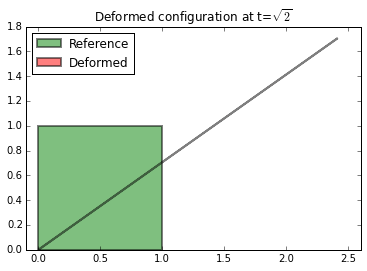

In [13]:
fig = plt.figure()
ax = fig.gca()

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Reference')
patch2 = patches.PathPatch(polygon_by_motion, facecolor='red', alpha=0.5, lw=2, label='Deformed')
ax.add_patch(patch1)
ax.add_patch(patch2)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')
plt.legend(loc=2)
plt.title("Deformed configuration at t=$\sqrt{2}$")
plt.show(fig)

# (6) The spatial density $\rho(\mathbf{x},t)$

\begin{equation}
  \rho = \frac{\rho_{0}}{J} = \frac{\rho_{0}}{1-0.5t^{2}}
\end{equation}

# (7) Local mass conservation

\begin{equation}
  \frac{\partial \rho(t)}{\partial t} = \frac{\rho_{0}t}{(1-0.5t^{2})^{2}}
\end{equation}
and
\begin{equation}
  \nabla \cdot (\rho \mathbf{v} ) = \rho (\frac{\partial v_{1}}{\partial x_{1}} + \frac{\partial v_{2}}{\partial x_{2}} ) = \rho (-\frac{t}{2-t^{2}} -\frac{t}{2-t^{2}} ) = -\frac{\rho_{0}}{1-0.5t^{2}} \frac{2t}{2-t^{2}} = -\frac{\rho_{0}t}{(1-0.5t^{2})^{2}}
\end{equation}
Therefore,
\begin{equation}
  \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{v} ) = 0.
\end{equation}



# (8) Verification of the Gauss theorem

From the above results, we know that $\nabla \cdot (\rho \mathbf{v} )$ is uniform in the space. So,
\begin{equation}
  \begin{split}
  \int_{V(t)} \nabla \cdot (\rho \mathbf{v} ) dV &= -\frac{\rho_{0}t}{(1-0.5t^{2})^{2}} \int_{V(t)} dV
     = -\frac{\rho_{0}t}{(1-0.5t^{2})^{2}} \int_{V_{0}} J dV_{0} \\
     &= -\frac{\rho_{0}t}{(1-0.5t^{2})^{2}} J \int_{V_{0}} dV_{0}
     = -\frac{\rho_{0}t}{(1-0.5t^{2})}.
  \end{split}
\end{equation}

We denote the edges and normals of a deformed configuration at time $t$ as follows:
<img src="http://www.ceri.memphis.edu/people/echoi2/ceri8353/HW1_2016_Q2_8.png" width="600">
<!--%![deformed configuration at t](/Users/eunseo/Google\ Drive/Courses/CERI7353-8353-Geodynamics/assignments/2016/HW1_2016_Q2_8.png)-->

We note that 
\begin{equation}
  \int_{\partial V(t)} \rho \mathbf{v} \cdot \mathbf{n} dS = 
  \int_{e_{0}(t)} \rho \mathbf{v} \cdot \mathbf{n_{0}} dl + \int_{e_{1}(t)} \rho \mathbf{v} \cdot \mathbf{n_{1}} dl
  + \int_{e_{2}(t)} \rho \mathbf{v} \cdot \mathbf{n_{2}} dl + \int_{e_{3}(t)} \rho \mathbf{v} \cdot \mathbf{n_{3}} dl.
\end{equation}

- $\mathbf{n}_{0} = (\cos \alpha^{\prime}, \sin \alpha^{\prime})$
\begin{align}
  \cos \alpha^{\prime} &= \cos (\alpha-\frac{\pi}{2}) = \cos (\frac{\pi}{2}-\alpha) = \sin \alpha = \frac{0.5t}{\sqrt{1+(0.5t)^{2}}} \\
  \sin \alpha^{\prime} &= \sin (\alpha-\frac{\pi}{2}) = -\sin (\frac{\pi}{2}-\alpha) = -\cos \alpha = -\frac{1}{\sqrt{1+(0.5t)^{2}}}
\end{align}

- $\mathbf{n}_{3} = (\cos \beta^{\prime}, \sin \beta^{\prime})$
\begin{align}
  \cos \beta^{\prime} &= \cos (\beta+\frac{\pi}{2}) = -\sin \beta = -\frac{1}{\sqrt{1+t^{2}}} \\
  \sin \beta^{\prime} &= \sin (\beta+\frac{\pi}{2}) = \cos \beta = \frac{t}{\sqrt{1+t^{2}}}
\end{align}

- $\mathbf{n}_{2} = -\mathbf{n}_{0}$
\begin{align}
  \mathbf{n}_{2} = \left( -\frac{0.5t}{\sqrt{1+(0.5t)^{2}}}, \frac{1}{\sqrt{1+(0.5t)^{2}}} \right)
\end{align}

- $\mathbf{n}_{1} = -\mathbf{n}_{3}$
\begin{align}
  \mathbf{n}_{1} = \left( \frac{1}{\sqrt{1+t^{2}}}, -\frac{t}{\sqrt{1+t^{2}}} \right)
\end{align}

Along the edge 0 ($e_{0}$), $x_{2} = 0.5tx_{1}$ and $dl = \sqrt{dx_{1}^{2}+dx_{2}^{2}} = \sqrt{1+(dx_{2}/dx_{1})^{2}} dx_{1} = \sqrt{1+(0.5t)^{2}} dx_{1}$.
\begin{equation}
  \begin{split}
  \int_{e_{0}} \rho \mathbf{v} \cdot \mathbf{n}_{0} dl 
    &= \rho  \int_{e_{0}} \left( \frac{2x_{2}-x_{1}t}{2-t^{2}} \frac{0.5t}{\sqrt{1+(0.5t)^{2}}} 
    - \frac{x_{1}-x_{2}t}{2-t^{2}} \frac{1}{\sqrt{1+(0.5t)^{2}}} \right) dl \\
    &= -\frac{\rho_{0}}{1-0.5t^{2}} \frac{(1-0.5t^{2})}{(2-t^{2})\sqrt{1+(0.5t)^{2}}} \int_{0}^{1} x_{1} \sqrt{1+(0.5t)^{2}} dx_{1} dx_{1} \\
    &=  -\frac{\rho_{0}}{2(2-t^{2})}.
  \end{split}
\end{equation}

Along the edge 1 ($e_{1}$), $x_{2} = (x_{1}-1)/t+0.5t$ and $dl = \sqrt{1+1/t^{2}}dx_{1}=\frac{\sqrt{1+t^{2}}}{t}dx_{1}$.
\begin{equation}
  \begin{split}
  \int_{e_{1}} \rho \mathbf{v} \cdot \mathbf{n}_{1} dl 
    &= \rho  \int_{e_{1}} \left( \frac{2x_{2}-x_{1}t}{2-t^{2}} \frac{1}{\sqrt{1+t^{2}}} 
    - \frac{x_{1}-x_{2}t}{2-t^{2}} \frac{t}{\sqrt{1+t^{2}}} \right) dl \\
    &= \frac{\rho_{0}}{1-0.5t^{2}} \frac{1}{\sqrt{1+t^{2}}} \int_{1}^{1+t} \left[ \frac{1}{t}(x_{1}-1)-\frac{t}{2} \right] \frac{\sqrt{1+t^{2}}}{t} dx_{1} \\
    &= \frac{\rho_{0}}{1-0.5t^{2}} \frac{0.5t(1-t)}{\sqrt{1+t^{2}}} \frac{\sqrt{1+t^{2}}}{t} = \frac{\rho_{0}(1-t)}{2-t^{2}}.
  \end{split}
\end{equation}

Along the edge 2 ($e_{2}$), $x_{2} = 0.5t(x_{1}-t)+1$ and $dl=\sqrt{1+(0.5t)^{2}}dx_{1}$.
\begin{equation}
  \begin{split}
  \int_{e_{2}} \rho \mathbf{v} \cdot \mathbf{n}_{2} dl 
    &= \frac{\rho_{0}}{1-0.5t^{2}}  \int_{e_{2}} \left( -\frac{2x_{2}-x_{1}t}{2-t^{2}} \frac{0.5t}{\sqrt{1+(0.5t)^{2}}} + \frac{x_{1}-x_{2}t}{2-t^{2}} \frac{1}{\sqrt{1+(0.5t)^{2}}} \right) dl \\
    &= \frac{\rho_{0}}{1-0.5t^{2}} \frac{1}{\sqrt{1+(0.5t)^{2}}} \int_{t}^{1+t} \left[ -0.5t + 0.5(x_{1}-t \right] \sqrt{1+(0.5t)^{2}} dx_{1} \\
    &=  \frac{\rho_{0}(1-2t)}{2(2-t^{2})}.
  \end{split}
\end{equation}

Along the edge 3 ($e_{3}$), $x_{2} = x_{1}/t$ and $dl = \frac{\sqrt{1+t^{2}}}{t}dx_{1}$.
\begin{equation}
  \begin{split}
  \int_{e_{3}} \rho \mathbf{v} \cdot \mathbf{n}_{3} dl 
    &= \rho  \int_{e_{3}} \left( -\frac{2x_{2}-x_{1}t}{2-t^{2}} \frac{1}{\sqrt{1+t^{2}}}
    + \frac{x_{1}-x_{2}t}{2-t^{2}} \frac{t}{\sqrt{1+t^{2}}} \right) dl \\
    &= -\frac{\rho_{0}}{1-0.5t^{2}} \frac{1}{t\sqrt{1+t^{2}}} \int_{0}^{t} x_{1} \frac{\sqrt{1+t^{2}}}{t} dx_{1} \\
    &=  -\frac{\rho_{0}}{1-0.5t^{2}} \frac{1}{t\sqrt{1+t^{2}}} \frac{t^{2}}{2} \frac{\sqrt{1+t^{2}}}{t}
    = -\frac{\rho_{0}}{(2-t^{2})}.
  \end{split}
\end{equation}

Finally, we get
\begin{equation}
  \begin{split}
  \int_{\partial V(t)} \rho \mathbf{v} \cdot \mathbf{n} dS 
  &= \int_{e_{0}(t)} \rho \mathbf{v} \cdot \mathbf{n_{0}} dl + \int_{e_{1}(t)} \rho \mathbf{v} \cdot \mathbf{n_{1}} dl
  + \int_{e_{2}(t)} \rho \mathbf{v} \cdot \mathbf{n_{2}} dl + \int_{e_{3}(t)} \rho \mathbf{v} \cdot \mathbf{n_{3}} dl \\
  &= -\frac{\rho_{0}}{2(2-t^{2})} + \frac{\rho_{0}(1-t)}{2-t^{2}} + \frac{\rho_{0}(1-2t)}{2(2-t^{2})} + -\frac{\rho_{0}}{(2-t^{2})} \\
  &= -\frac{\rho_{0}t}{(1-0.5t^{2})}.
  \end{split}
\end{equation}

Therefore
\begin{equation}
 \int_{V(t)} \nabla \cdot (\rho \mathbf{v} ) dV = \int_{\partial V(t)} \rho \mathbf{v} \cdot \mathbf{n} dS
\end{equation}